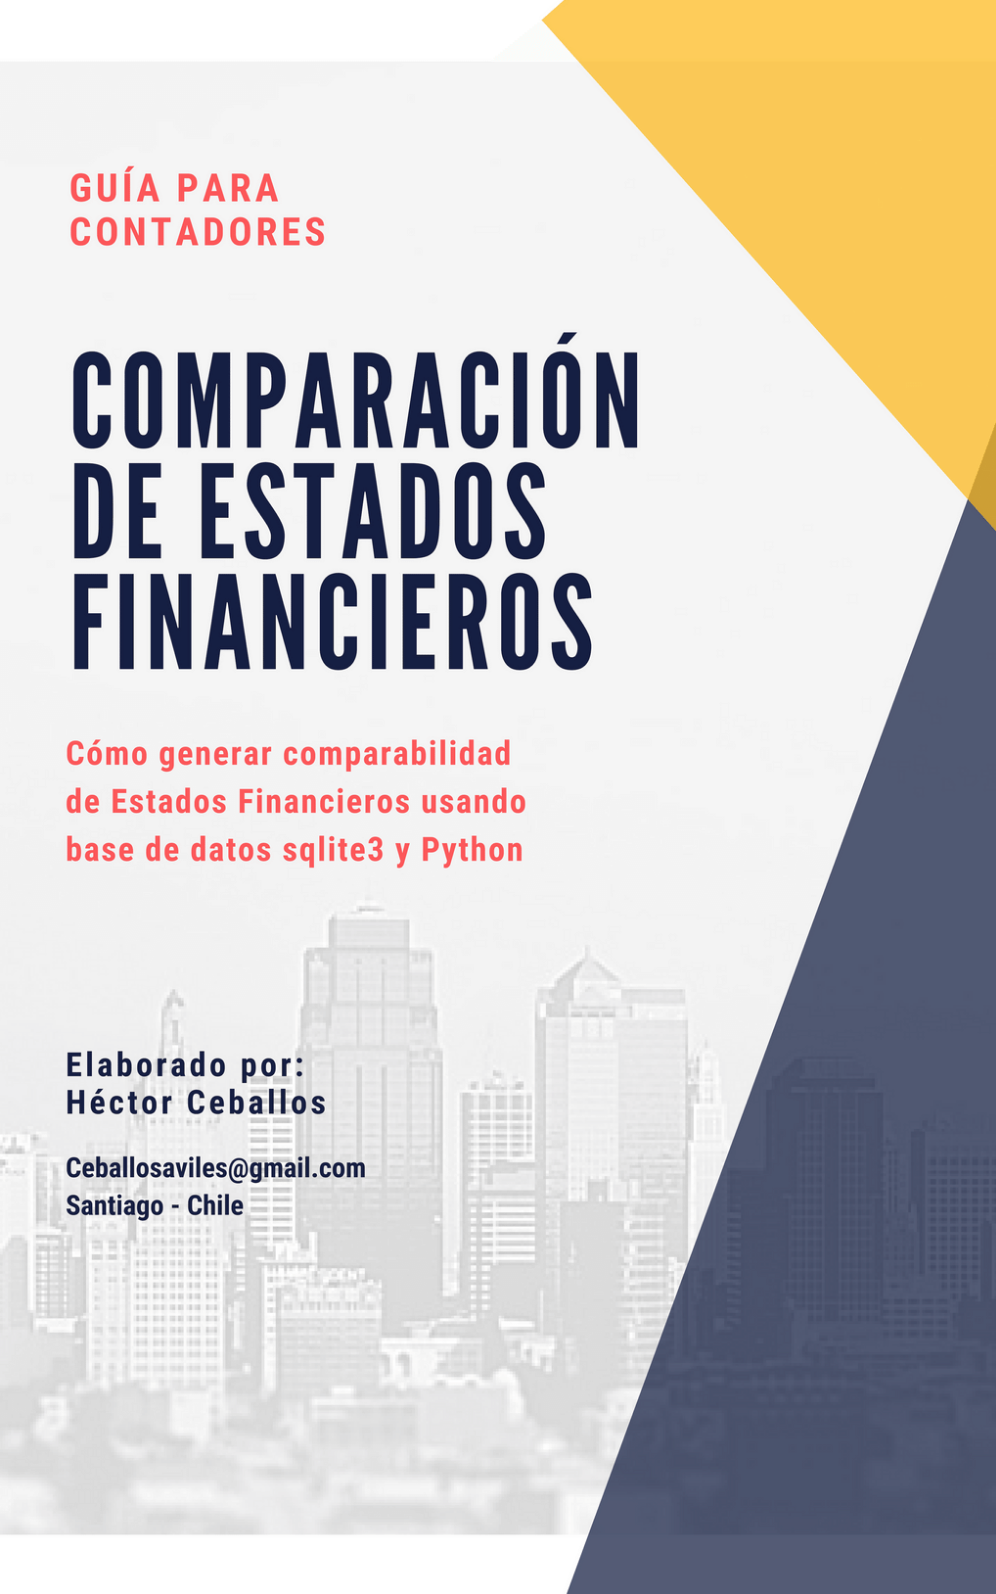

In [89]:
from IPython.display import Image
Image(filename='Comparabilidad_de_estados_financieros.png')

¡Hola! Soy Héctor.  

Soy Contador Auditor, y me encanta la música, el ajedrez, y más recientemente tengo una obsesión con el lenguaje de programación Python . Tanto es así que decidí iniciar un pequeño blog divertido para documentar mis aventuras explorando su utilidad en el mundo de la contabilidad.  


Si eres un contador que nunca ha oído hablar de Python o si has oído hablar de él pero no lo has usado, este es el blog para ti.  Te aliento a dejar comentarios y sugerencias sobre temas futuros para que podamos explorar Python juntos.  
Envíame cualquier idea que tengas a ceballosaviles@gmail.com.

Las publicaciones estarán en mi [Github](https://github.com/hceballos), en una de las siguientes categorías: 

#### •	Contador Auditor.
#### •	Control de Gestión.
#### •	Análisis de Datos.  

Siéntete libre de descargar y utilizar mi contenido.   


Saludos,
#### Héctor Ceballos 
## --------------------------------------------------------------------------------------------



Sin vueltas, vamos al grano.
### ¿QUÉ se quiere hacer?  
Comparar las cifras de los estados financieros de 4 años consecutivos

### ¿POR QUÉ quiere hacer?
Proporcionar información útil para el proceso de predicción.

<span style="color:green"> •	Es Rápido : </span>La Python puede obtener y modificar datos con mucha mayor velocidad que otros formatos de archivo. Así es posible satisfacer con rapidez consultas particulares del momento, sin necesidad de búsquedas visuales o procesos que requieren mucho tiempo.  

<span style="color:green"> •	Es menos Laborioso : </span>Las tareas mecánicas siempre serán mejor realizadas por las maquinas.  

<span style="color:green"> •	Es Actual : </span>Se dispone en cualquier momento de información precisa y al día.  

<span style="color:green"> •	Cómodo : </span>Al tener la información en un mismo sitio, ahorraremos tiempo y trabajo.


<h3><left><span style="color:black">¿PARA QUÉ se quiere hacer?</span></center></h3>
Para conocer tendencias.

### CUANTO se quiere hacer?  
METAS

### DONDE se va hacer?  

<h3><left><span style="color:black">¿CÓMO se va hacer?</span></center></h3>
1) Importacion de módulo sqlite3.   
2) Lectura de libro mayor en formato .csv (Aproximadamente 14.000 registros en menos de 2 segundos).   
3) Crear una base de datos.   
4) Crear una tabla en la base de datos.   
5) Limpiar de informacion innecesaria (Lineas en blanco).   
6) Dar nuevo formato a columna Fecha.   
7) Normalizar informacion, transformando caracteres especiales.   
8) Insertar los registros leidos de Libro mayor a la base de datos.   
9) Confirmar la creacion de una base de datos con toda la informacion del libro mayor   


### CUANDO se va hacer?  


<h3><left><span style="color:black">¿A QUIENES va dirigido?</span></center></h3>
Esta guía está dirigida a todos aquellos contadores y profesionales en general que buscan ampliar sus conocimientos sobre el manejo de grandes volumenes de información, generar informacion util y aumentar el rendiemiento del trabajo diario.
### QUIENES lo van hacer?

### Código Completo:
El código tambien está disponible en mi Github.  
Siéntete libre de descargar y utilizar mi contenido.

In [90]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import sqlite3
import numpy as np
import pandas as pd
from xlsxwriter.utility import xl_rowcol_to_cell

cnx = sqlite3.connect('data.db')

consulta  = "SELECT \
t_last_year.cuenta as CUENTA, \
last_year as [AÑO PASADO], \
last_month as [MES PASADO], \
last_week as [SEMANA PASADA], \
current_week as [SEMANA ACTUAL] \
FROM \
	(SELECT \
		cuenta, \
		Sum(debe-haber) AS last_year \
	FROM \
		MovimientosTabla \
	WHERE \
		fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW', '-1 YEAR') \
	GROUP BY \
		cuenta \
	HAVING \
		cuenta LIKE '%' \
		AND \
		[last_year]<>0 \
	ORDER BY \
		cuenta asc \
	)t_last_year \
 \
 \
LEFT JOIN \
	(SELECT \
		cuenta, \
		Sum(debe-haber) AS last_month \
	FROM \
		MovimientosTabla \
	WHERE \
		fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW', '-1 MONTHS') \
	GROUP BY \
		cuenta \
	HAVING \
		cuenta LIKE '%' \
		AND \
		[last_month]<>0 \
	ORDER BY \
		cuenta asc \
	)t_last_month \
 \
ON t_last_month.cuenta = t_last_year.cuenta \
 \
LEFT JOIN \
	(SELECT \
		cuenta, \
		Sum(debe-haber) AS last_week \
	FROM \
		MovimientosTabla \
	WHERE \
		fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW', '-7 DAYS') \
	GROUP BY \
		cuenta \
	HAVING \
		cuenta LIKE '%' \
		AND \
		[last_week]<>0 \
	ORDER BY \
		cuenta asc \
	)t_last_week \
 \
 \
ON t_last_week.cuenta = t_last_year.cuenta \
LEFT JOIN \
	(SELECT \
		cuenta, \
		Sum(debe-haber) AS current_week \
	FROM \
		MovimientosTabla \
	WHERE \
		fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW') \
	GROUP BY \
		cuenta \
	HAVING \
		cuenta LIKE '%' \
		AND \
		[current_week]<>0 \
	ORDER BY \
		cuenta asc \
    )t_current_week \
 \
 \
ON t_current_week.cuenta = t_last_year.cuenta \
;"



consulta2= " \
SELECT \
	t_last_year.IDENTIFICACION, \
	anio_pasado as [AÑO PASADO], \
	hoy as [MES PASADO], \
	(hoy - anio_pasado) as [VAR ASBOLUTA $], \
	(CAST( ROUND(hoy *1.00 / anio_pasado, 2) AS FLOAT)-1)*100 as [VAR RELATIVA %] \
	 \
FROM (	SELECT \
			IDENTIFICACION, \
			Sum(debe-haber) AS anio_pasado \
		FROM \
			MovimientosTabla INNER JOIN ADO ON MovimientosTabla.CUENTA = ado.CUENTA2 \
		WHERE \
			grupo like '%' \
			and fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW', '-1 YEAR') \
		GROUP BY \
			identificacion \
		HAVING \
			grupo like '%' \
			and \
			anio_pasado <>0 \
		order by \
			cuenta \
		) t_last_year \
 \
	LEFT JOIN \
        (SELECT \
            IDENTIFICACION, \
            Sum(debe-haber) AS hoy \
		FROM \
			MovimientosTabla INNER JOIN ADO ON MovimientosTabla.CUENTA = ado.CUENTA2 \
        WHERE \
            grupo like '%' \
            and fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW') \
        GROUP BY \
            identificacion \
        HAVING \
            grupo like '%' \
            and hoy <>0 \
            order by \
            cuenta \
        ) t_last_month \
 \
ON \
t_last_month.identificacion = t_last_year.identificacion"



datos = pd.read_sql_query(consulta, cnx)

datos2 = pd.read_sql_query(consulta2, cnx)
print (datos2)

writer = pd.ExcelWriter('Comparabilidad_de_estados_financieros.xlsx', engine='xlsxwriter')
datos.to_excel(writer, sheet_name='Todas las cuentas')
datos2.to_excel(writer, sheet_name='Por Grupos')

writer.save()


                       IDENTIFICACION  AÑO PASADO  MES PASADO  VAR ASBOLUTA $  \
0                   Activo Circulante  2278480194  1942136059      -336344135   
1                         Activo Fijo    22472540    28422391         5949851   
2                   Pasivo Circulante  -373591580  -147239619       226351961   
3                  Pasivo Largo Plazo -1519266084 -1145773820       373492264   
4                          Patrimonio -1177932733 -1534608767      -356676034   
5             Ingresos de explotacion -2985496568 -3747732413      -762235845   
6               Costos de explotacion  3685409377  4651514533       966105156   
7  Otros egresos fuera de explotacion    48240947   110919771        62678824   

   VAR RELATIVA %  
0           -15.0  
1            26.0  
2           -61.0  
3           -25.0  
4            30.0  
5            26.0  
6            26.0  
7           130.0  
